In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [7]:
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from dogo.constants import FIG_DIR
from dogo.results import get_sac_pools, get_experiment_details, PoolArrs
from dogo.rollouts.split import split_halfcheetah_v2_trans_arr
from dogo.visualisation.model_pool_plotting import (
    model_pool_visitation_2dhist,
    model_pool_unpen_rewards_2dhist,
    model_pool_pen_rewards_2dhist,
    model_pool_penalties_2dhist,
    model_pool_rmse_2dhist
)

In [27]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [17]:
EXP_LIST = [
    # No REx - MOPO Pen 1 - Rollout Length 10 - 1 Retrain Epoch
    'MP874',
    'MP875',
    'MP876',
    # REx - MOPO Pen 1 - Rollout Length 10 - 1 Retrain Epoch
    'MP877',
    'MP878',
    'MP879',
]
SUBSAMPLE_SIZE = None
training_results = {}
for exp in EXP_LIST:
    # print(exp)
    training_results[exp] = PoolArrs(*get_sac_pools(exp, subsample_size=SUBSAMPLE_SIZE))

# Reward Histograms

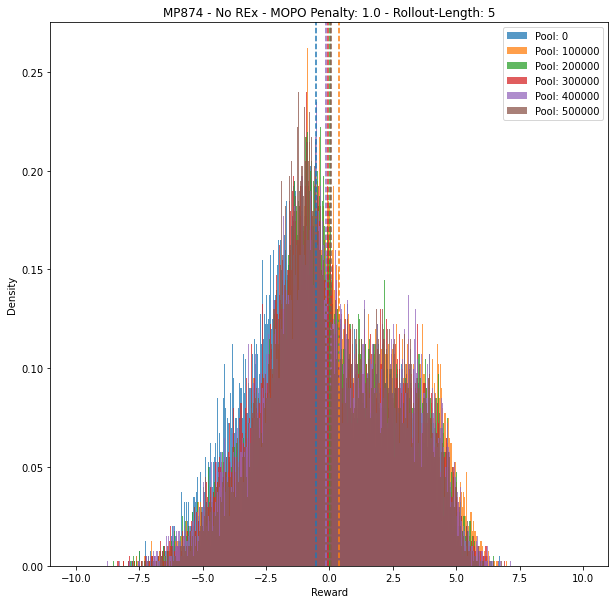

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

exp = 'MP874'
for i, pool_id in enumerate(range(0,600000,100000)):
    pool, _, _, _, _ = get_sac_pools(exp, pool=str(pool_id))
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(pool)
    ax.hist(rew, bins=np.linspace(-10,10,500), density=True, color=cols[i], alpha=0.75, label=f'Pool: {pool_id}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_xlabel('Reward')
ax.set_ylabel('Density')
ax.set_title(f'{exp} - No REx - MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.legend()

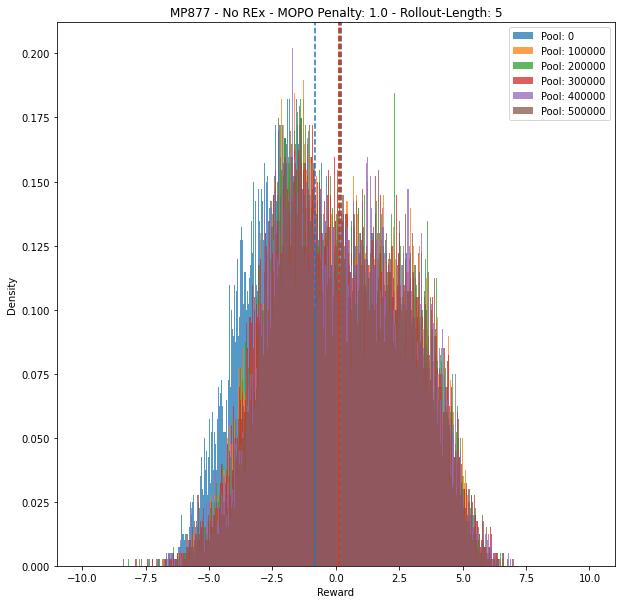

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

exp = 'MP877'
for i, pool_id in enumerate(range(0,600000,100000)):
    pool, _, _, _, _ = get_sac_pools(exp, pool=str(pool_id))
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(pool)
    ax.hist(rew, bins=np.linspace(-10,10,500), density=True, color=cols[i], alpha=0.75, label=f'Pool: {pool_id}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_xlabel('Reward')
ax.set_ylabel('Density')
ax.set_title(f'{exp} - No REx - MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.legend()

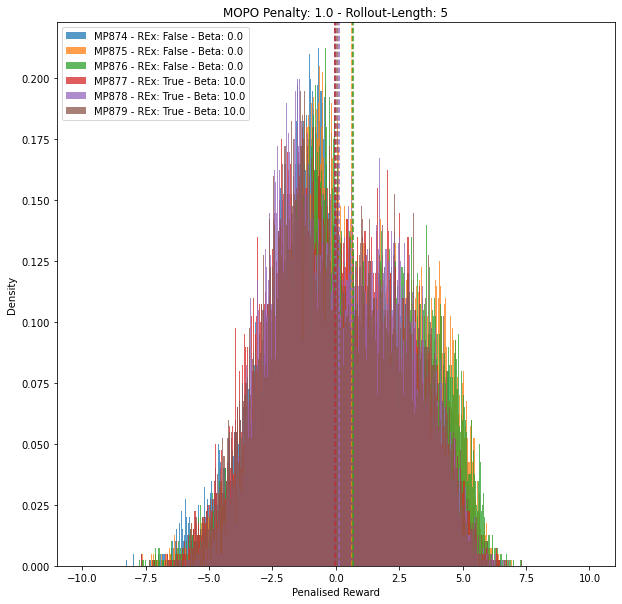

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(rew, bins=np.linspace(-10,10,500), density=True, color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Penalised Reward')
ax.set_ylabel('Density')
ax.legend(loc='upper left')

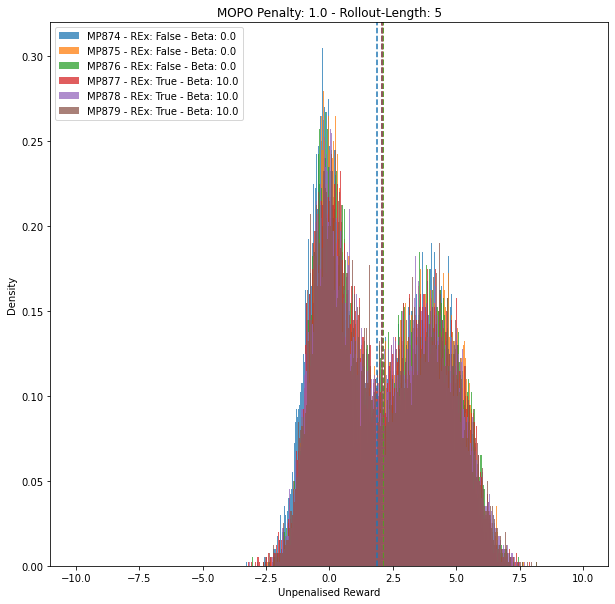

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(rew+1*pen, bins=np.linspace(-10,10,500), density=True, color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline((rew+1*pen).mean(), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Unpenalised Reward')
ax.set_ylabel('Density')
ax.legend(loc='upper left')

# Penalty Histograms

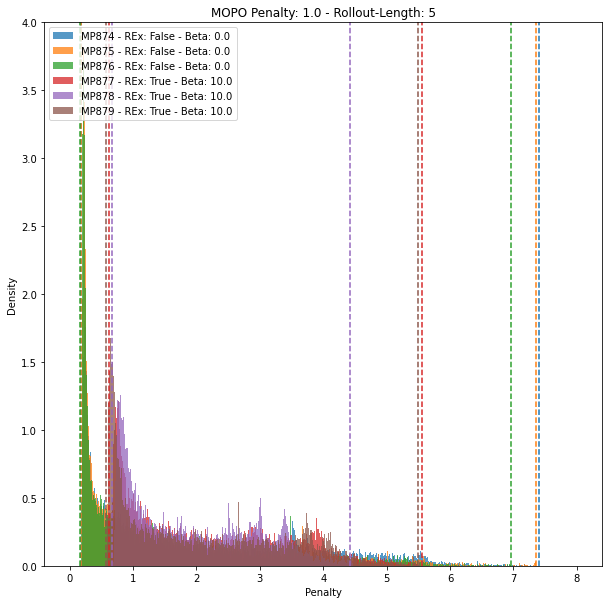

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(pens, bins=np.linspace(0,8,500), density=True, color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Penalty')
ax.set_ylabel('Density')
ax.legend(loc='upper left')

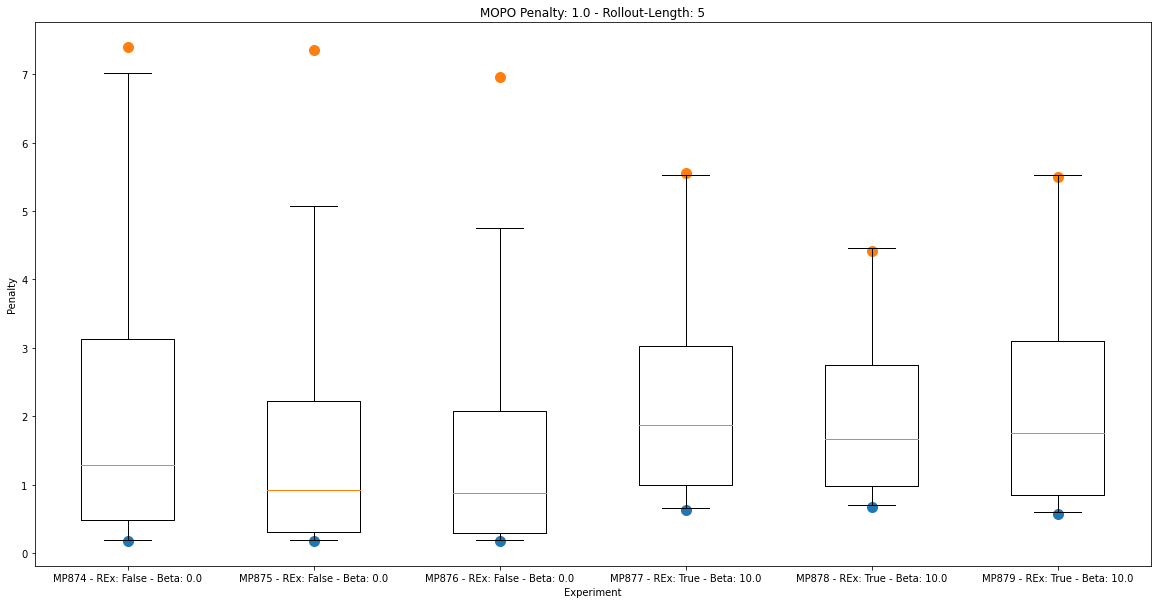

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

labels = []
pens_arrs = []
min_pens = []
max_pens = []
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pens_arrs.append(pens.flatten())
    
    labels.append(f'{exp} - REx: {rex} - Beta: {beta}')
    min_pens.append(exp_details.min_penalty)
    max_pens.append(exp_details.max_penalty)

x_vals = np.arange(len(pens_arrs))+1
ax.boxplot(pens_arrs, showfliers=False)
ax.scatter(x_vals, min_pens, s=100)
ax.scatter(x_vals, max_pens, s=100)

ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Experiment')
ax.set_ylabel('Penalty')
ax.set_xticks(x_vals)
ax.set_xticklabels(labels)
pass

# RMSE Histograms

MP874: 1.7221133708953857, 21.04434585571289
MP875: 1.3654775619506836, 24.57577896118164
MP876: 1.274933099746704, 24.218521118164062
MP877: 1.988711953163147, 19.11330795288086
MP878: 1.8866685628890991, 17.576326370239258
MP879: 1.9463330507278442, 17.45510482788086


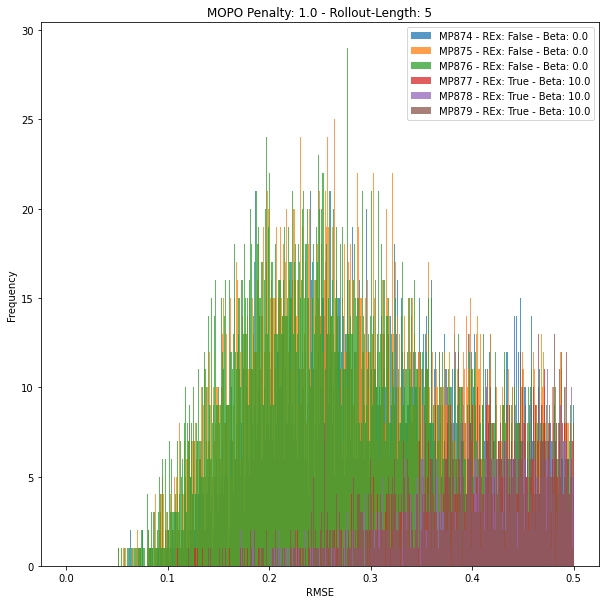

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    ax.hist(np.sqrt(training_results[exp].mse_results), bins=np.linspace(0,0.5,500), color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(np.nanmean(np.sqrt(training_results[exp].mse_results)), color=cols[i], ls='--')
    print(f'{exp}: {np.nanmean(np.sqrt(training_results[exp].mse_results))}, {np.nanmax(np.sqrt(training_results[exp].mse_results))}')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('RMSE')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

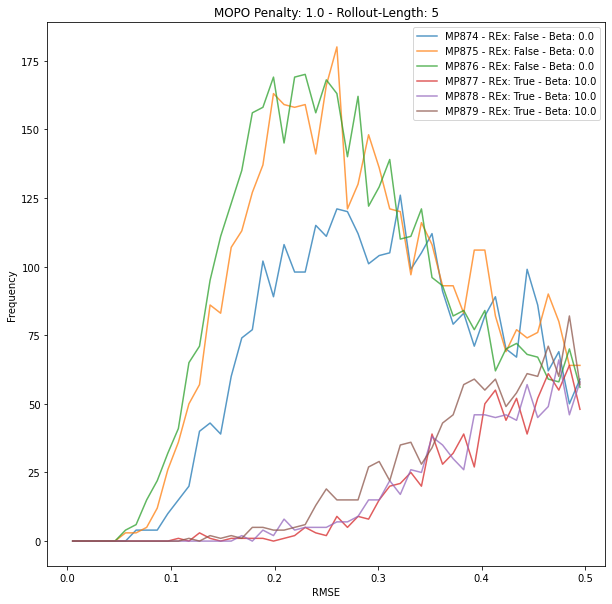

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    bin_min, bin_max, bin_size = 0, 0.5, 50
    bins = np.linspace(bin_min, bin_max, bin_size)
    hist_arr, _ = np.histogram(np.sqrt(training_results[exp].mse_results), bins=bins)
    plt.plot((bins + bin_max/(2*(bin_size-1)))[:-1], hist_arr, color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(np.nanmean(np.sqrt(training_results[exp].mse_results)), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('RMSE')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

Text(0, 0.5, 'Overall MSE')

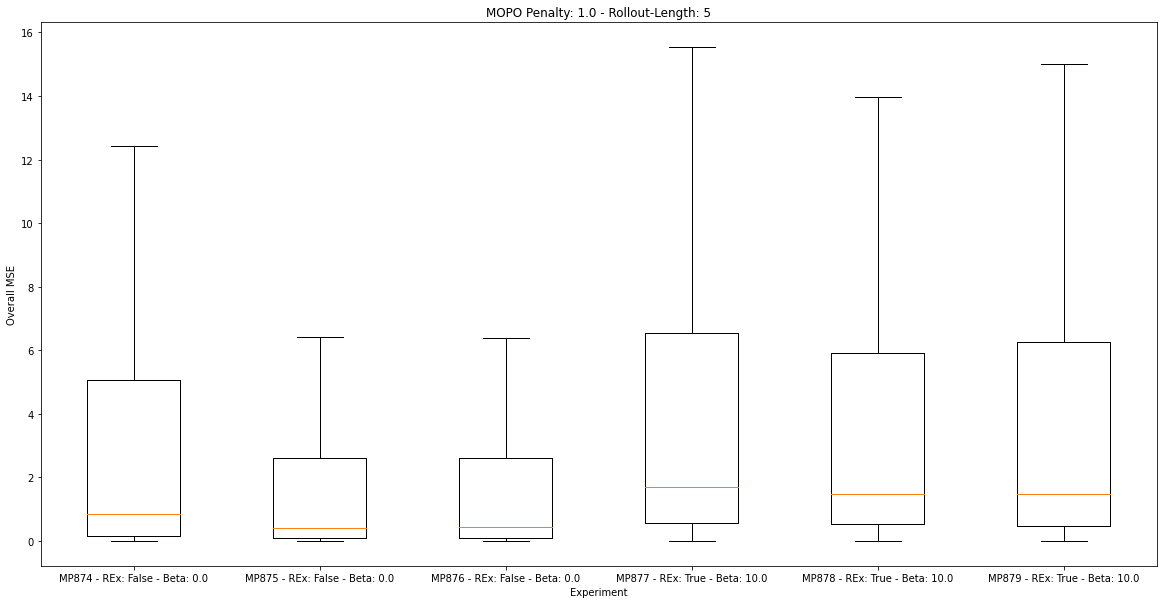

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

labels = []
rmse_arrs = []
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    labels.append(f'{exp} - REx: {rex} - Beta: {beta}')
    rmse_arrs.append(np.nan_to_num(training_results[exp].mse_results).flatten())

ax.boxplot(rmse_arrs, showmeans=False, showfliers=False, labels=labels)

ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Experiment')
ax.set_ylabel('Overall MSE')
# ax.set_ylim(-0.01,0.35)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MP874: 192.71356201171875
MP875: 19.881898880004883
MP876: 19.773290634155273
MP877: 20.44114875793457
MP878: 20.150663375854492
MP879: 19.950973510742188


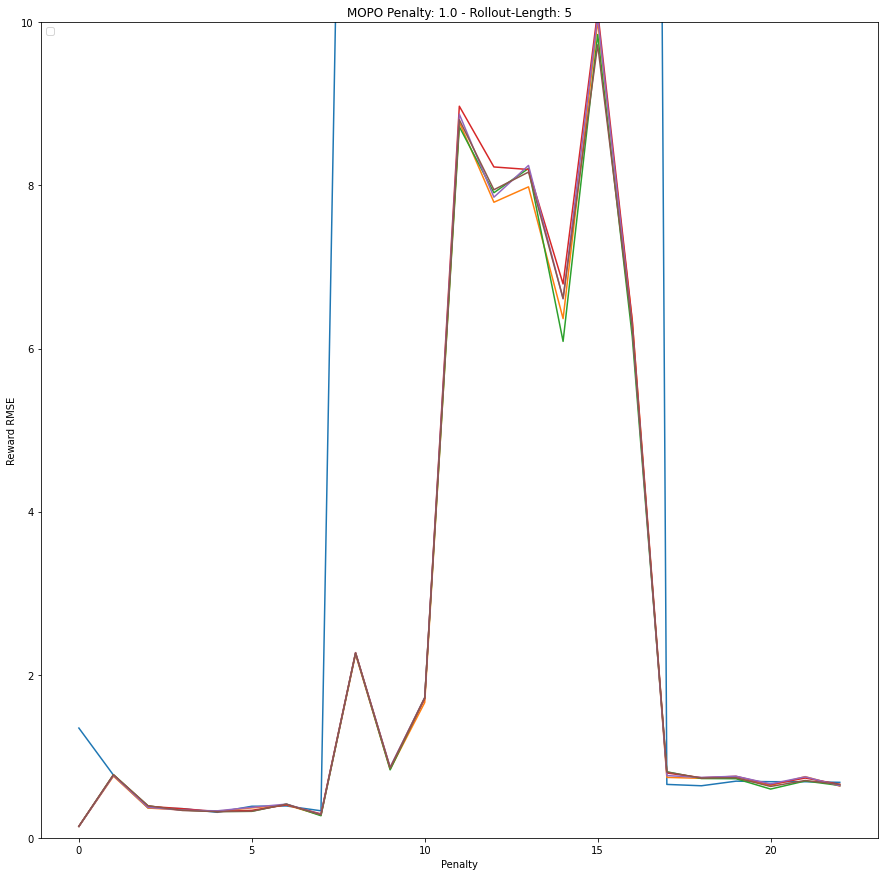

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    obs, act, _, _, _, _, _ = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    obs_act = np.hstack((obs, act))
    plt.plot(obs_act.std(axis=0))
    print(f'{exp}: {np.linalg.norm(obs_act.std(axis=0))}')

ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Penalty')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(0, 10)
ax.legend(loc='upper left')

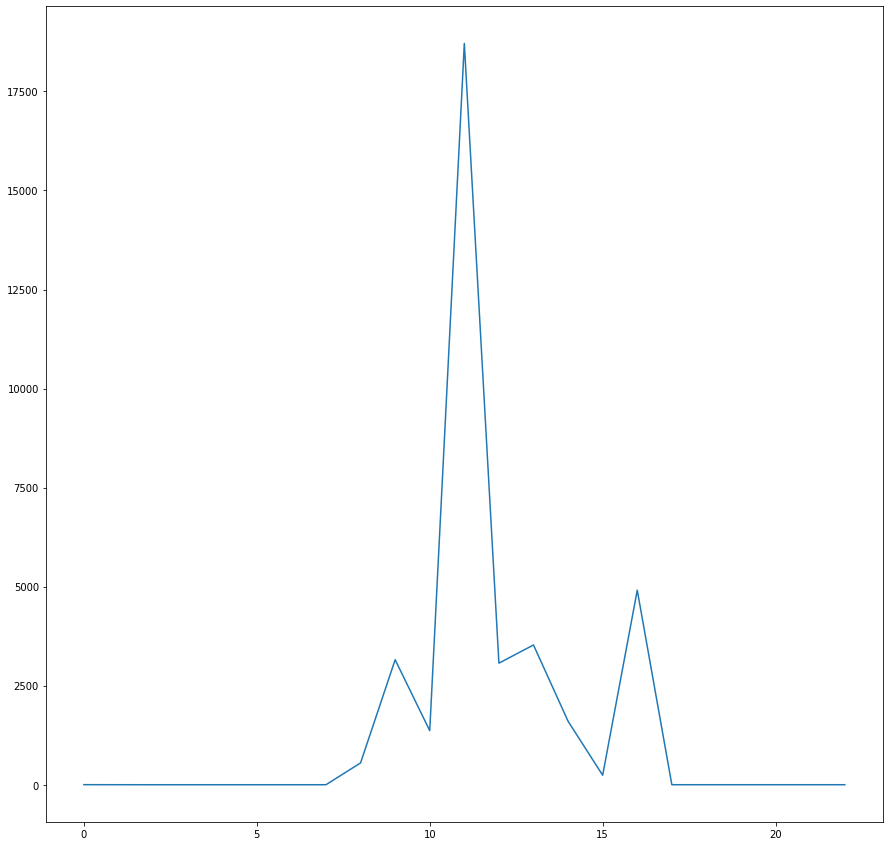

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
obs, act, _, _, _, _, _ = split_halfcheetah_v2_trans_arr(training_results["MP874"].pool)
obs_act = np.hstack((obs, act))
plt.plot(obs_act.var(axis=0))

In [97]:
obs.var(axis=1).shape

(10000,)

# Penalty/Reward RMSE Calibration

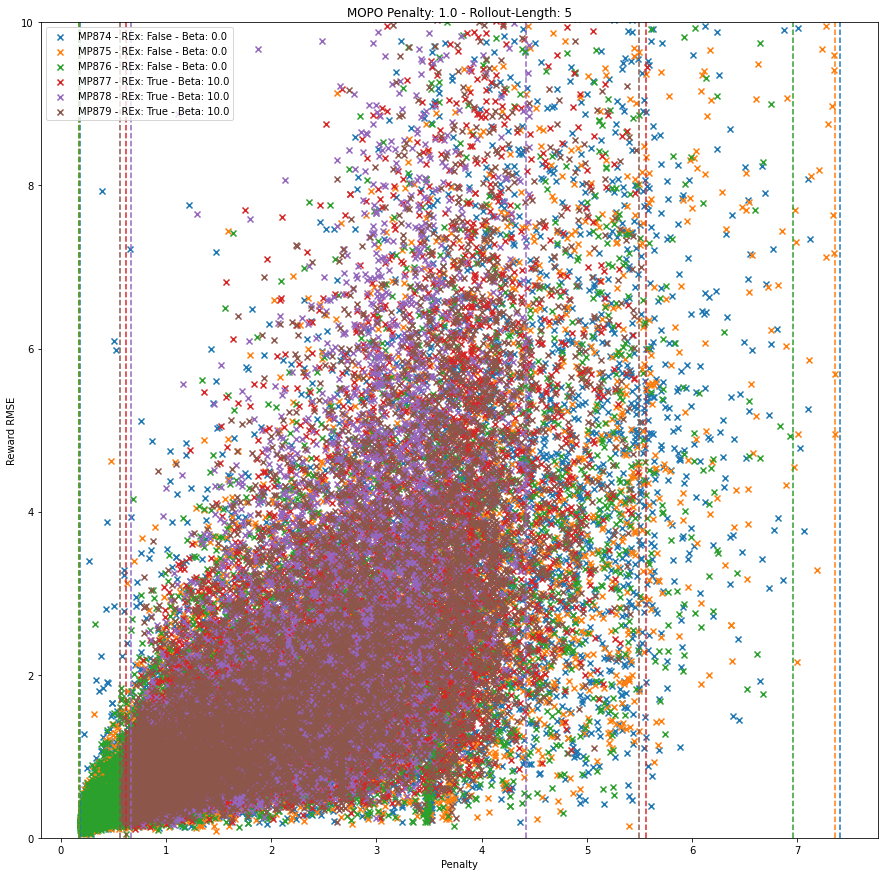

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(pens, np.sqrt(training_results[exp].mse_results), marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Penalty')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(0, 10)
ax.legend(loc='upper left')

In [7]:
from sklearn.linear_model import LinearRegression

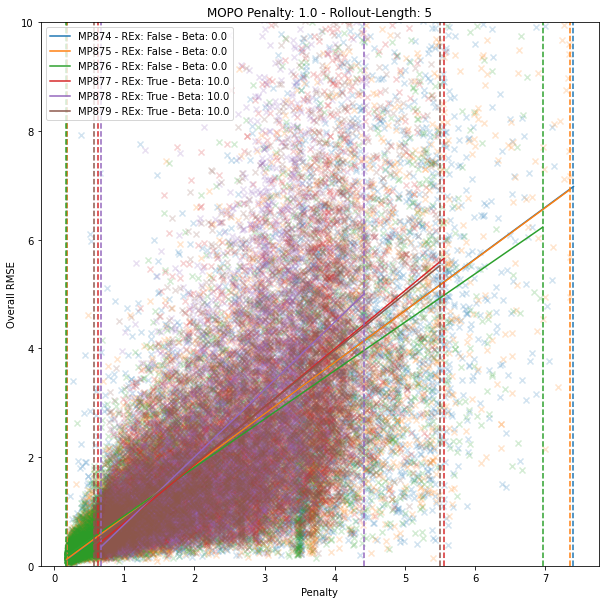

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    mse_results = np.sqrt(training_results[exp].mse_results)

    nan_filter = np.isnan(mse_results.flatten())
    pens = pens.flatten()[~nan_filter][:,None]
    mse_results = mse_results.flatten()[~nan_filter][:,None]

    # pens = pens/(pens.max()-pens.min())
    # mse_results = mse_results/(mse_results.max()-pens.min())

    ax.scatter(pens, mse_results, marker='x', color=cols[i], alpha=0.2)

    reg = LinearRegression().fit(pens, mse_results)
    x_vals = np.linspace(exp_details.min_penalty, exp_details.max_penalty)[:,None]
    y_vals = reg.predict(x_vals)

    ax.plot(x_vals, y_vals, label=f'{exp} - REx: {rex} - Beta: {beta}')

    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Penalty')
ax.set_ylabel('Overall RMSE')
ax.set_ylim(0, 10)
ax.legend(loc='upper left')

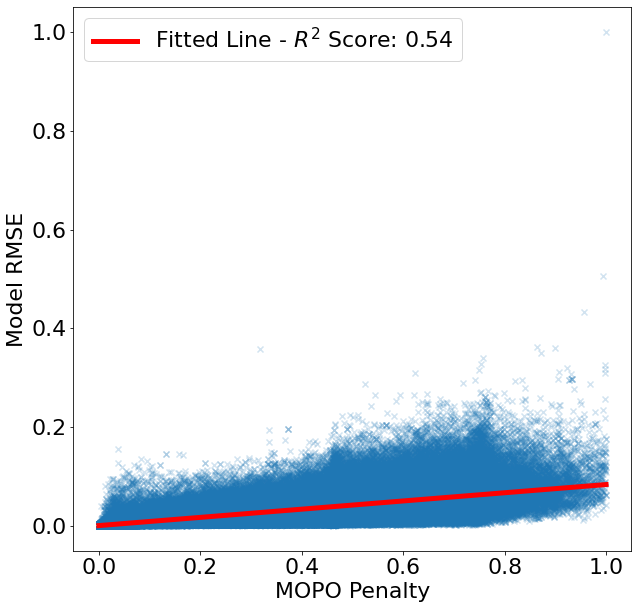

In [29]:
plt.rc('font', size=22)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    mse_results = np.sqrt(training_results[exp].mse_results)

    nan_filter = np.isnan(mse_results.flatten())
    pens = pens.flatten()[~nan_filter][:,None]
    mse_results = mse_results.flatten()[~nan_filter][:,None]

    large_val_filter = mse_results.flatten() < 1e2
    pens = pens.flatten()[large_val_filter][:,None]
    mse_results = mse_results.flatten()[large_val_filter][:,None]

    pens = (pens-pens.min())/(pens.max()-pens.min())
    mse_results = (mse_results-mse_results.min())/(mse_results.max()-mse_results.min())

    ax.scatter(pens, mse_results, marker='x', color=cols[i], alpha=0.2)

    reg = LinearRegression().fit(pens, mse_results)
    x_vals = np.linspace(0,1)[:,None]
    y_vals = reg.predict(x_vals)

    ax.plot(x_vals, y_vals, c='red', linewidth=5.0, label=f'Fitted Line - $R^2$ Score: {reg.score(pens, mse_results):.2f}')

    # ax.axvline(exp_details.min_penalty/(pens.max()-pens.min()), color='k', ls='--')
    # ax.axvline(exp_details.max_penalty/(pens.max()-pens.min()), color='k', ls='--')
# ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('MOPO Penalty')
ax.set_ylabel('Model RMSE')
# ax.set_ylim(0, 10)
ax.legend(loc='upper left')

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'novice_mopo_penalty_model_error_mopo_1_ro_5_no_rex.png'), pad_inches=0.2, bbox_inches='tight')

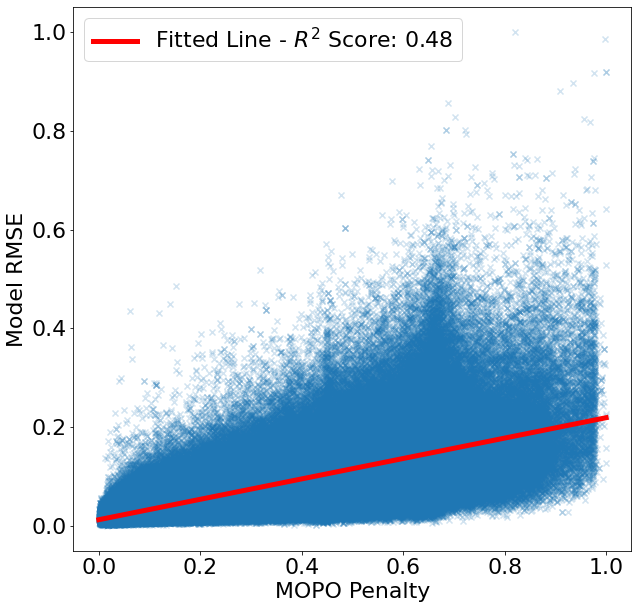

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP877", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    mse_results = np.sqrt(training_results[exp].mse_results)

    nan_filter = np.isnan(mse_results.flatten())
    pens = pens.flatten()[~nan_filter][:,None]
    mse_results = mse_results.flatten()[~nan_filter][:,None]

    pens = (pens-pens.min())/(pens.max()-pens.min())
    mse_results = (mse_results-mse_results.min())/(mse_results.max()-mse_results.min())

    ax.scatter(pens, mse_results, marker='x', color=cols[i], alpha=0.2)

    reg = LinearRegression().fit(pens, mse_results)
    x_vals = np.linspace(0,1)[:,None]
    y_vals = reg.predict(x_vals)

    ax.plot(x_vals, y_vals, c='red', linewidth=5.0, label=f'Fitted Line - $R^2$ Score: {reg.score(pens, mse_results):.2f}')

    # ax.axvline(exp_details.min_penalty/(pens.max()-pens.min()), color='k', ls='--')
    # ax.axvline(exp_details.max_penalty/(pens.max()-pens.min()), color='k', ls='--')
# ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('MOPO Penalty')
ax.set_ylabel('Model RMSE')
# ax.set_ylim(0, 10)
ax.legend(loc='upper left')

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'novice_mopo_penalty_model_error_mopo_1_ro_5.png'), pad_inches=0.2, bbox_inches='tight')

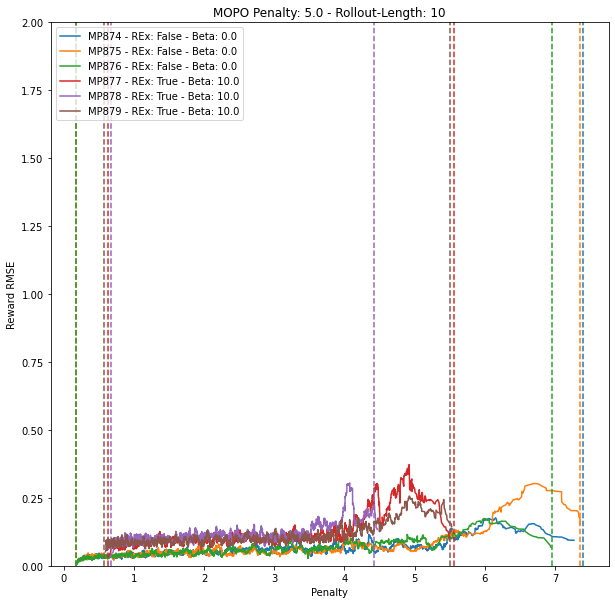

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(pen_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    rmse_err_convolved = np.convolve(rmse_err_vals, kernel, mode='same')

    ax.plot(pen_vals, rmse_err_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(0, 2)
ax.legend(loc='upper left')

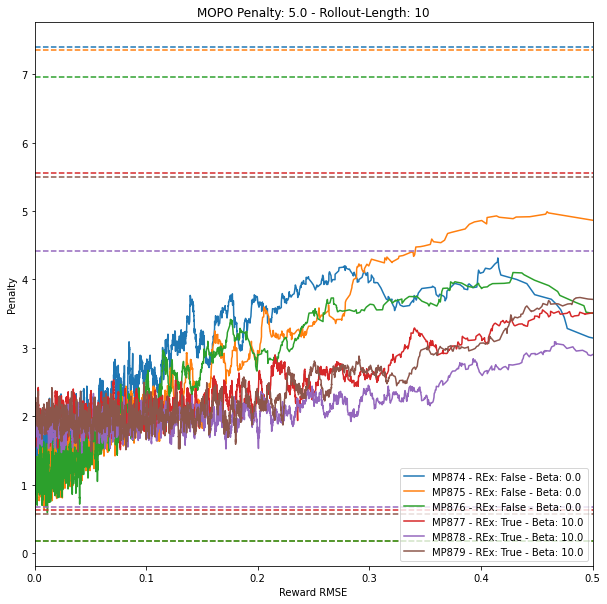

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(rmse_err_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    pen_convolved = np.convolve(pen_vals, kernel, mode='same')

    ax.plot(rmse_err_vals, pen_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Reward RMSE')
ax.set_ylabel('Penalty')
ax.set_xlim(0, 0.5)
ax.legend(loc='lower right')

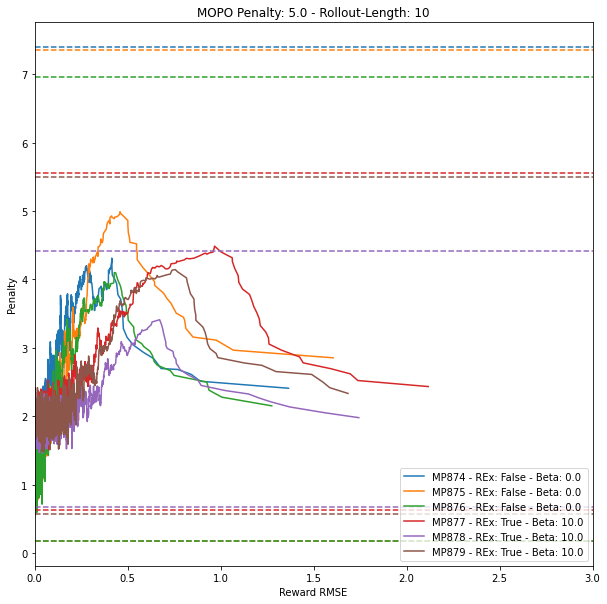

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(rmse_err_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    pen_convolved = np.convolve(pen_vals, kernel, mode='same')

    ax.plot(rmse_err_vals, pen_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Reward RMSE')
ax.set_ylabel('Penalty')
ax.set_xlim(0, 3)
ax.legend(loc='lower right')

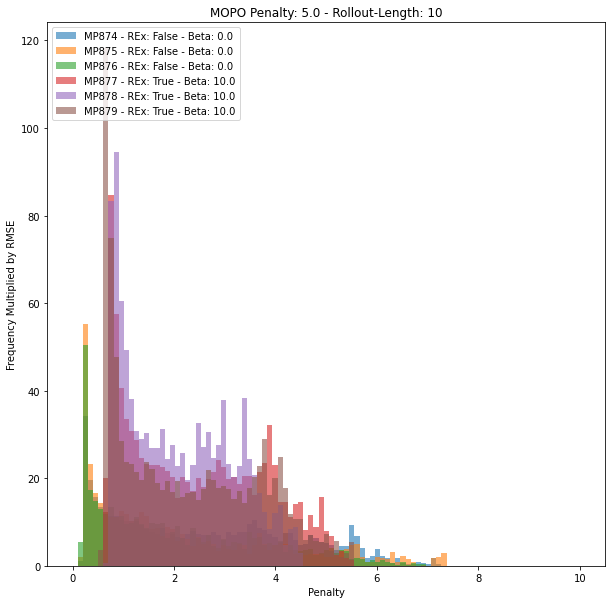

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    rmse_vals = np.sqrt(training_results[exp].mse_results).flatten()
    rmse_lim = rmse_vals < 15
    ax.hist(pens.flatten()[rmse_lim], weights=rmse_vals[rmse_lim], bins=np.linspace(0,10,100), color=cols[i], alpha=0.6, label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    # ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Frequency Multiplied by RMSE')
ax.legend(loc='upper left')

# Reward/Reward RMSE

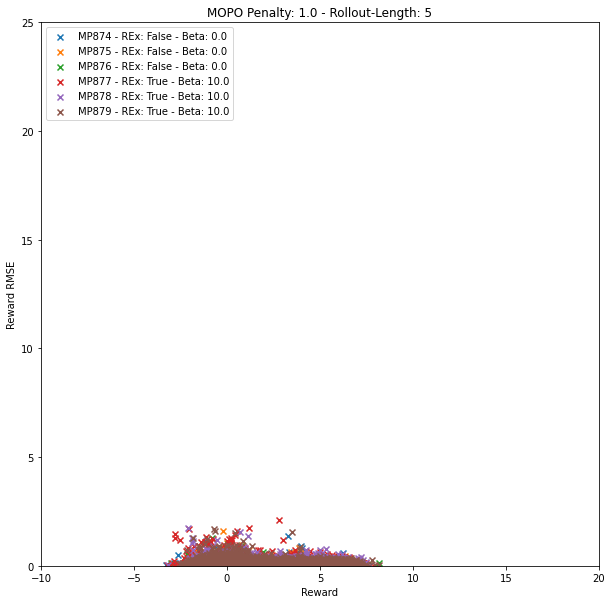

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(rew+1*pen, np.sqrt(training_results[exp].mse_results), marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Reward')
ax.set_ylabel('Reward RMSE')
ax.set_xlim(-10, 20)
ax.set_ylim(0, 25)
ax.legend(loc='upper left')

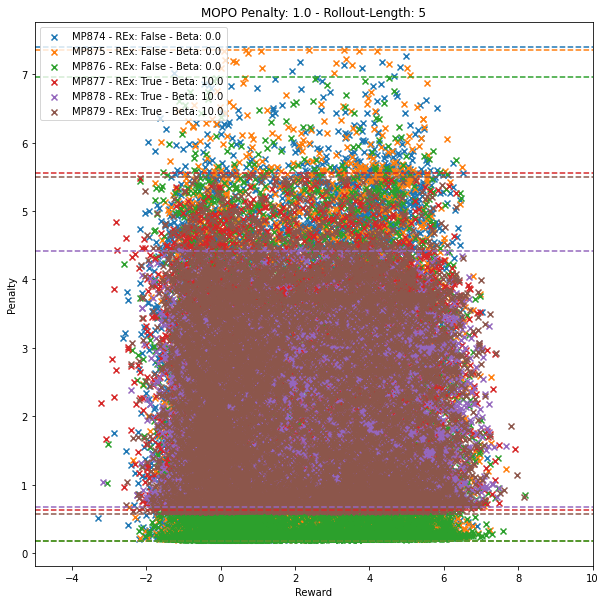

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP874", False, 0.0),
    ("MP875", False, 0.0),
    ("MP876", False, 0.0),
    ("MP877", True, 10.0),
    ("MP878", True, 10.0),
    ("MP879", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(rew+1*pen, pen, marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Reward')
ax.set_ylabel('Penalty')
ax.set_xlim(-5, 10)
# ax.set_ylim(0, 40)
ax.legend(loc='upper left')